[3.73222634e-03 3.99021440e-03 4.17525899e-03 3.54686303e-03
 3.65514823e-03 2.06971581e-03 3.46322098e-03 3.10424830e-03
 1.70041566e-03 3.55715102e-03 3.54536398e-03 3.10783102e-03
 2.65059059e-03 5.18224416e-03 4.06368781e-03 3.77609309e-03
 4.39045209e-03 3.70488585e-03 3.78325276e-03 4.82952704e-03
 3.55085996e-03 4.40533549e-03 3.28703984e-03 6.20827530e-03
 3.07522900e-03 3.30395921e-03 6.43930627e-03 3.96040322e-03
 5.16320188e-03 3.89990224e-03 5.20881094e-03 4.06153909e-03
 4.03059698e-03 5.38853816e-03 4.33182268e-03 2.60702694e-03
 3.15198914e-03 3.39752953e-03 3.12686808e-03 3.19944643e-03
 4.36693655e-03 3.04228976e-03 5.68451248e-03 5.18966568e-03
 4.97359845e-03 4.62048112e-03 3.89462213e-03 3.64003274e-03
 4.02873571e-03 4.05395466e-03 6.71688693e-07 4.55085557e-03
 2.94883734e-03 2.90407224e-04 8.54648727e-03 7.52528758e-03
 1.07572668e-02 7.95164110e-03 4.47729797e-03 4.63012192e-03
 8.99324258e-03 4.36279365e-03 4.53579363e-03 9.55723051e-03
 5.53358519e-03 1.780406

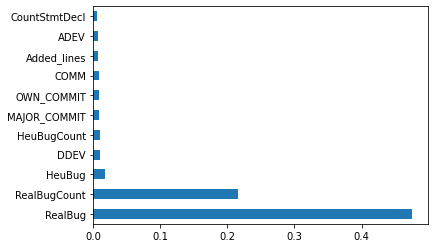

In [23]:
import pandas as pd
import numpy as np
data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv")
data = data.drop('File', axis=1)
X = data.iloc[:,0:]  #independent columns
y = data.iloc[:,-1]    #target column i.e Realbug
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [24]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')

outcome = 'RealBug'
features = ['Added_lines', 'COMM', 'MAJOR_COMMIT', 'OWN_COMMIT', 'ADEV', 'DDEV', 'HeuBugCount', 'HeuBug', 'RealBugCount', 'CountStmtDecl']
## 'HeuBugCount', 'DDEV', 'HeuBug', 'RealBugCount'
# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]

class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [25]:
X_test

,Added_lines,COMM,MAJOR_COMMIT,OWN_COMMIT,ADEV,DDEV,HeuBugCount,HeuBug,RealBugCount,CountStmtDecl
File,,,,,,,,,,
lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java,0,0,0,0.000000,0,0,0,False,0,34
lucene/backwards/src/test/org/apache/lucene/analysis/TestAnalyzers.java,0,0,0,0.000000,0,0,0,False,0,35
lucene/backwards/src/test/org/apache/lucene/analysis/TestASCIIFoldingFilter.java,0,0,0,0.000000,0,0,0,False,0,24
lucene/backwards/src/test/org/apache/lucene/analysis/TestCachingTokenFilter.java,0,0,0,0.000000,0,0,0,False,0,29
lucene/backwards/src/test/org/apache/lucene/analysis/TestCharArraySet.java,0,0,0,0.000000,0,0,0,False,0,24
...,...,...,...,...,...,...,...,...,...,...
solr/src/webapp/src/org/apache/solr/servlet/SolrDispatchFilter.java,37,7,4,0.428571,7,4,0,False,0,89
solr/src/webapp/src/org/apache/solr/servlet/SolrRequestParsers.java,0,0,0,0.000000,0,0,0,False,0,102
solr/src/webapp/src/org/apache/solr/servlet/SolrServlet.java,33,4,2,0.750000,4,2,0,False,0,44


In [26]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [27]:
y_test.value_counts()

0    2699
1     107
Name: RealBug, dtype: int64

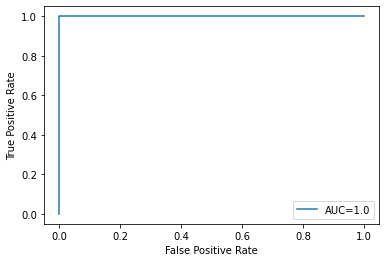

In [28]:
from sklearn import metrics
y_pred_proba = our_rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## LIME

In [123]:
!pip install scikit-plot

In [29]:
X_test.iloc[0, : ]

Added_lines          0
COMM                 0
MAJOR_COMMIT         0
OWN_COMMIT         0.0
ADEV                 0
DDEV                 0
HeuBugCount          0
HeuBug           False
RealBugCount         0
CountStmtDecl       34
Name: lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java, dtype: object

In [30]:
# Import for LIME
import lime
import lime.lime_tabular

file_to_be_explained = 'lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java'

print(f'Explaining {file_to_be_explained} with LIME')

Explaining lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java with LIME


In [31]:
# LIME Step 1 - Construct an explainer
our_lime_explainer = lime.lime_tabular.LimeTabularExplainer(
                            training_data = X_train.values,  
                            mode = 'classification',
                            training_labels = y_train,
                            feature_names = features,
                            class_names = class_labels,
                            discretize_continuous = True)
                            
# LIME Step 2 - Use the constructed explainer with the predict function 
# of your predictive model to explain any instance
lime_local_explanation_of_an_instance = our_lime_explainer.explain_instance(
                           # X_test[0],
                          # data_row = X_test.loc['FileName.py', : ], 
                            data_row = X_test.loc[file_to_be_explained, : ],
                            predict_fn = our_rf_model.predict_proba, 
                            num_features = 10,
                            top_labels = 1)

#explainer = lime_tabular.LimeTabularExplainer(X_train, mode = "regression", feature_names = boston_housing.feature_names)
#explanation = explainer.explain_instance(X_test[0], model.predict, num_features = len(boston_housing.feature_names))
                            
# Please use the code below to visualise the generated LIME explanation.
lime_local_explanation_of_an_instance.show_in_notebook()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


## SHAP

In [32]:
# Import libraries for SHAP
import subprocess
import sys
import importlib
import numpy
import shap

file_to_be_explained = 'lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java'
file_to_be_explained_idx = list(X_test.index).index(file_to_be_explained)

In [33]:
# explainer = shap.Explainer(our_rf_model, numpy.ascontiguousarray(X_train))
# shap_values = explainer(numpy.ascontiguousarray(X_test))

explainer = shap.Explainer(our_rf_model)
shap_values = explainer(X_test)

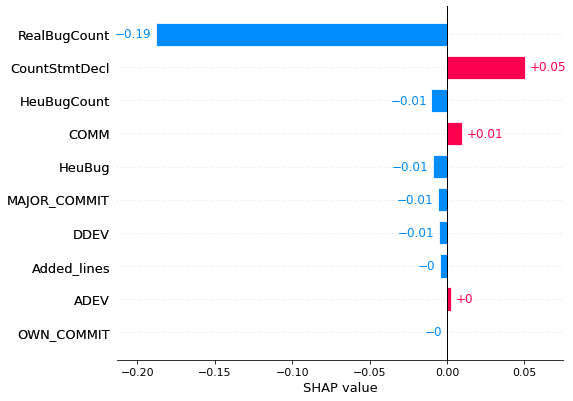

In [34]:
import matplotlib.pyplot as plt
shap.plots.bar(shap_values[file_to_be_explained_idx, :, 1], show=True)

## BreakDown

In [35]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')


outcome = 'RealBug'
features = ['Added_lines', 'COMM', 'MAJOR_COMMIT', 'OWN_COMMIT', 'ADEV', 'DDEV', 'HeuBugCount', 'HeuBug', 'RealBugCount', 'CountStmtDecl']
# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]

class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [36]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [37]:
#necessary imports
from pyBreakDown.explainer import Explainer
from pyBreakDown.explanation import Explanation
#make explainer object
exp = Explainer(clf=our_rf_model, data= X_train, colnames=features)

In [38]:
#make explanation object that contains all information

explanation = exp.explain(observation=X_train.iloc[0,:].values,direction="up",useIntercept=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

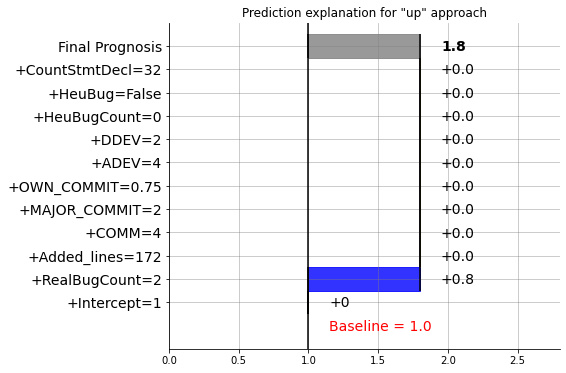

In [39]:
explanation.visualize()

## PyExplainer

In [43]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')

outcome = 'RealBug'
features = ['Added_lines', 'COMM', 'MAJOR_COMMIT', 'OWN_COMMIT', 'ADEV', 'DDEV', 'HeuBugCount', 'HeuBug', 'RealBugCount', 'CountStmtDecl']
# OWN_COMMIT - # code ownership
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]


class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [45]:
from pyexplainer.pyexplainer_pyexplainer import PyExplainer
file_to_be_explained = 'lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java'
import numpy as np
np.random.seed(0)

pyexp = PyExplainer(X_train = X_train,
                           y_train = y_train,
                           indep = X_train.columns,
                           dep = outcome,
                           blackbox_model = rf_model)

# PyExplainer Step 2 - Generate the rule-based explanation of an instance to be explained
exp_obj = pyexp.explain(X_explain = X_test.loc[file_to_be_explained,:].to_frame().transpose(),
                        y_explain = pd.Series(bool(y_test.loc[file_to_be_explained]), 
                                                      index = [file_to_be_explained],
                                                      name = outcome),
                        search_function = 'crossoverinterpolation',
                        max_iter=1000,
                        max_rules=20,
                        random_state=0,
                        reuse_local_model=True)

# Print rule 
exp_obj['top_k_positive_rules'][:1]

# Please use the code below to visualise the generated PyExplainer explanation (What-If interactive visualisation).
pyexp.visualise(exp_obj, title="Why this file is predicted as defect-introducing?")


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

## PDP

In [21]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')


#outcome = 'RealBug'
#features = ['MAJOR_COMMIT', 'ADEV', 'COMM', 'OWN_COMMIT', 'CountClassCoupled', 'HeuBugCount', 'DDEV', 'HeuBug', 'HeuBugCount']
outcome = 'RealBug'
features = ['Added_lines', 'COMM', 'MAJOR_COMMIT', 'OWN_COMMIT', 'ADEV', 'DDEV', 'HeuBugCount']
# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]

class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [23]:
import numpy as np
import pandas as pd
# sklearn version: v1.0.1
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)
import matplotlib.pyplot as plt
import seaborn as sns


file_to_be_explained = 'lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java'

print(f'Explaining {file_to_be_explained} with PDP')

Explaining lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java with PDP


## Average Value of Added_lines

In [27]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [0], kind = 'average')

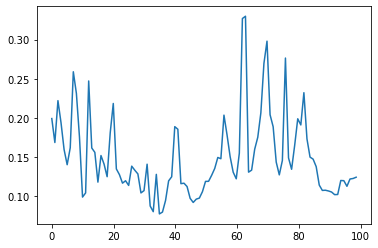

In [28]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of COMM

In [29]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [1], kind = 'average')

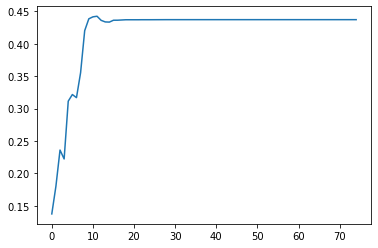

In [30]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of MAJOR_COMMIT

In [31]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [2], kind = 'average')

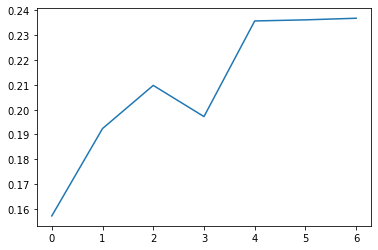

In [32]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of OWN_COMMIT

In [33]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [3], kind = 'average')

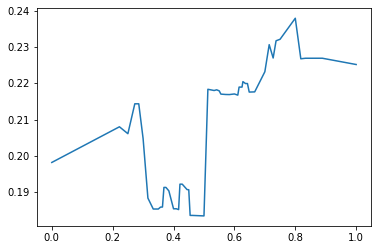

In [34]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of ADEV

In [35]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [4], kind = 'average')

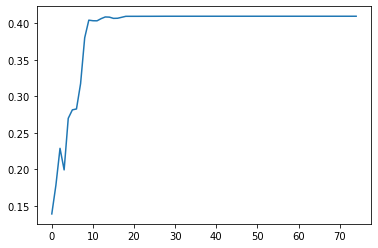

In [36]:
plt.plot(results['values'][0], results['average'][0])

## ICE

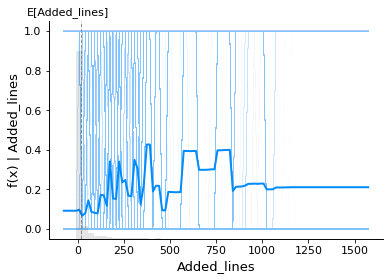

In [37]:
import subprocess
import sys
import importlib
import numpy
import shap

shap.plots.partial_dependence(
    "Added_lines", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

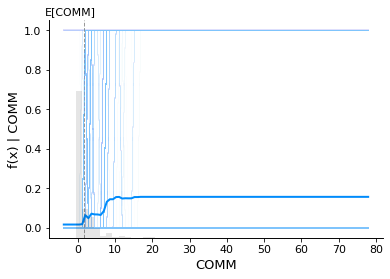

In [38]:
shap.plots.partial_dependence(
    "COMM", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)


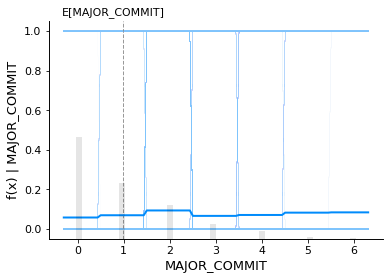

In [39]:
shap.plots.partial_dependence(
    "MAJOR_COMMIT", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

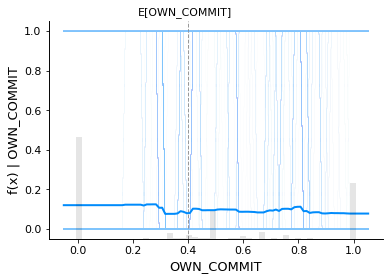

In [40]:
shap.plots.partial_dependence(
    "OWN_COMMIT", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

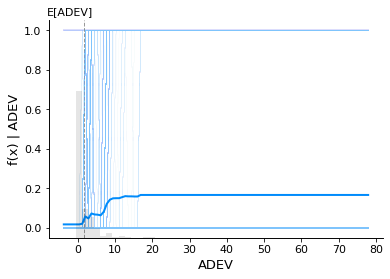

In [41]:
shap.plots.partial_dependence(
    "ADEV", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

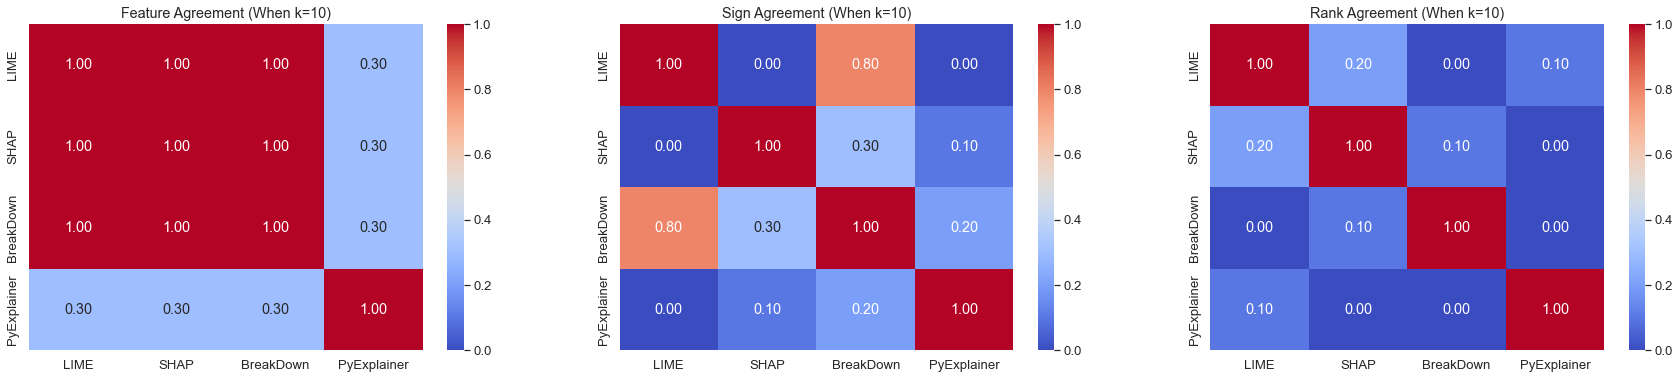

In [47]:
import seaborn as sns
import pandas as pd

data1 = pd.read_csv("/Users/saumenduroy/Desktop/TOSEM_replicationpackage/Feature Engineering_selection/k=10/FI_Feature Agreement.csv", index_col=0)
data2 = pd.read_csv("/Users/saumenduroy/Desktop/TOSEM_replicationpackage/Feature Engineering_selection/k=10/FI_Sign Agreement.csv", index_col=0)
data3 = pd.read_csv("/Users/saumenduroy/Desktop/TOSEM_replicationpackage/Feature Engineering_selection/k=10/FI_Rank Agreement.csv", index_col=0)


fig, ax = plt.subplots(1,3, figsize=(30, 6))


sns.set(font_scale=1.2)
sns.heatmap(data1, cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax= ax[0])
ax[0].title.set_text("Feature Agreement (When k=10)")

sns.heatmap(data2, cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax= ax[1])
ax[1].title.set_text("Sign Agreement (When k=10)")

sns.heatmap(data3, cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax= ax[2])
ax[2].title.set_text("Rank Agreement (When k=10)")


plt.show()